In [69]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

## load data

In [70]:
benign_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final-by-origin-tool.pkl')

In [71]:
malware_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/malware/1/datas-by-origin-tool.pkl')
for i in [2,3,4,5,6,7,8,9,10,11,12,13,42,43,44,45,46,47,48,49,50,52,53,54]:
    pkl_path = '/home/sdsra/Downloads/CTU-13-Dataset/malware/{}/datas-by-origin-tool.pkl'.format(str(i))
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [72]:
benign_datas['label'] = 'benign'
trains, tests = train_test_split(benign_datas, test_size=0.2)

In [73]:
benign_datas['label'].value_counts()

benign    6312
Name: label, dtype: int64

In [74]:
# malware_datas = malware_datas[malware_datas['label'] == 'botnot']
malware_datas = malware_datas[malware_datas['label'] == 'botnet']

In [75]:
malware_datas['label'].value_counts()

botnet    599
Name: label, dtype: int64

## nomalization

In [76]:
minMaxScaler = MinMaxScaler()
npScaled = minMaxScaler.fit_transform(trains.select_dtypes(include=[np.number]))

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## train

In [77]:
X = npScaled
input_flow = Input(shape=(28, ))
encoded = Dense(22, activation='relu')(input_flow)
encoded = Dense(15, activation='relu')(encoded)
decoded = Dense(22, activation='relu')(encoded)
decoded = Dense(28, activation='sigmoid')(decoded)
autoencoder = Model(input_flow, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X, X,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_split=0.1)

Train on 4544 samples, validate on 505 samples
Epoch 1/100
4544/4544 [==============================] - 0s 86us/step - loss: 0.1332 - val_loss: 0.0228
Epoch 2/100
4544/4544 [==============================] - 0s 35us/step - loss: 0.0107 - val_loss: 0.0080
Epoch 3/100
4544/4544 [==============================] - 0s 73us/step - loss: 0.0079 - val_loss: 0.0074
Epoch 4/100
4544/4544 [==============================] - 0s 73us/step - loss: 0.0071 - val_loss: 0.0064
Epoch 5/100
4544/4544 [==============================] - 0s 75us/step - loss: 0.0055 - val_loss: 0.0051
Epoch 6/100
4544/4544 [==============================] - 0s 50us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 7/100
4544/4544 [==============================] - 0s 38us/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/100
4544/4544 [==============================] - 0s 60us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/100
4544/4544 [==============================] - 0s 60us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/100
4544

4544/4544 [==============================] - 0s 55us/step - loss: 4.7833e-04 - val_loss: 3.9689e-04
Epoch 76/100
4544/4544 [==============================] - 0s 71us/step - loss: 4.6680e-04 - val_loss: 3.7590e-04
Epoch 77/100
4544/4544 [==============================] - 0s 73us/step - loss: 4.5747e-04 - val_loss: 3.7677e-04
Epoch 78/100
4544/4544 [==============================] - 0s 70us/step - loss: 4.5027e-04 - val_loss: 3.6747e-04
Epoch 79/100
4544/4544 [==============================] - 0s 71us/step - loss: 4.4540e-04 - val_loss: 3.6256e-04
Epoch 80/100
4544/4544 [==============================] - 0s 71us/step - loss: 4.3689e-04 - val_loss: 3.5694e-04
Epoch 81/100
4544/4544 [==============================] - 0s 70us/step - loss: 4.3076e-04 - val_loss: 3.4584e-04
Epoch 82/100
4544/4544 [==============================] - 0s 71us/step - loss: 4.2251e-04 - val_loss: 3.5340e-04
Epoch 83/100
4544/4544 [==============================] - 0s 72us/step - loss: 4.2057e-04 - val_loss: 3.5395e

## evaluate

In [78]:
tests.select_dtypes(include=[np.number])

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
2840,2,563.5,83.372391,4096.0,3294.620179,0,1235,1,1,4,3.75,1.0,9,450,1.0,0.222222,1.0,-37.998999,0.0,108.061204,0.0,1.0,0.444444,98.207366,167.5,5206.616444,11192,1209421
3538,1,731.0,30.941454,2048.0,48.296903,0,209,1,1,3,2.00,20.0,10,154,1.0,0.400000,1.0,-22.739305,0.0,3.335347,0.0,1.0,0.300000,29.132196,0.0,66.705952,27315,91105
4874,1,730.0,22.843564,2048.0,-1.000000,0,13,1,1,1,2.00,1.0,1,12,1.0,0.000000,1.0,-22.840242,0.0,5.114849,0.0,1.0,1.000000,0.000000,0.0,-1.000000,862,4409
4591,1,1147.0,132.380655,2048.0,-1.000000,0,48,1,1,1,2.00,7.0,2,48,1.0,0.500000,1.0,-15.031145,0.0,3.524942,0.0,1.0,0.500000,5.652719,0.0,-1.000000,1724,6077
2298,1,1130.0,68.747838,2048.0,653.933218,0,77,1,1,4,4.00,2.0,4,71,1.0,0.500000,1.0,-14.761194,0.0,5.001343,0.0,1.0,1.000000,61.831538,0.0,652.125635,4469,22351
4888,1,1153.0,62.887984,2048.0,4.984307,0,173,1,1,7,2.00,6.0,7,123,1.0,0.285714,1.0,-14.060872,0.0,15.497872,0.0,1.0,1.000000,80.441841,0.0,9.966211,5873,91019
53,0,-1.0,0.406857,-1.0,0.058831,0,171,-1,-1,-1,-1.00,-1.0,36,180,1.0,0.083333,0.0,-1.000000,0.0,0.125000,0.0,0.0,0.000000,0.057512,-1.0,0.060794,1512,189
4495,1,823.0,71.617446,2048.0,-1.000000,0,17,1,1,1,2.00,2.0,1,16,1.0,0.000000,1.0,-20.284879,0.0,4.526119,0.0,1.0,1.000000,0.000000,0.0,-1.000000,804,3639
4971,1,735.0,49.220680,2048.0,-1.000000,0,30,1,1,2,2.00,2.0,2,29,1.0,0.500000,1.0,-22.628430,0.0,3.655135,0.0,1.0,1.000000,42.179188,0.0,-1.000000,1850,6762
910,1,412.0,259.703666,256.0,-1.000000,0,595,1,1,0,2.00,13.0,2,405,1.0,0.000000,1.0,0.349511,0.0,74.602455,0.0,1.0,1.000000,5.819483,0.0,-1.000000,9531,711036


In [29]:
malware_datas.select_dtypes(include=[np.number])

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp
0,1,365.0,8.679093,2048.0,667.106526,0,1627,1,-1,0,2.076923,2.0,26,3132,1.0,0.230769,0.0,0.216347,0.0,72.028298,0.0,1.0,1.0,3.446061,0.0,1533.317331,45904,3306387
1,1,365.0,8.456332,2048.0,1256.207871,0,768,1,-1,0,2.153846,2.0,13,1502,1.0,0.307692,0.0,0.216265,0.0,64.997118,0.0,1.0,1.0,3.865786,0.0,1987.078268,24292,1578910
2,1,365.0,1.904638,1024.0,-1.000000,0,31,-1,-1,0,2.000000,-1.0,2,78,1.0,0.000000,0.0,0.437548,0.0,21.536630,0.0,1.0,1.0,0.014335,0.0,-1.000000,2184,47036
3,1,730.0,1.283656,1024.0,-1.000000,0,9,-1,-1,0,2.000000,-1.0,1,18,1.0,0.000000,0.0,0.820889,0.0,2.859956,0.0,1.0,1.0,0.000000,0.0,-1.000000,914,2614
4,1,730.0,1.242682,1024.0,-1.000000,0,12,-1,-1,0,2.000000,-1.0,1,22,1.0,0.000000,0.0,0.820890,0.0,6.939796,0.0,1.0,1.0,0.000000,0.0,-1.000000,980,6801
5,1,730.0,1.302272,1024.0,-1.000000,0,9,-1,-1,0,2.000000,-1.0,1,18,1.0,0.000000,0.0,0.820892,0.0,2.636653,0.0,1.0,1.0,0.000000,0.0,-1.000000,944,2489
6,1,365.0,2.199899,2048.0,-1.000000,0,11,-1,-1,0,3.000000,-1.0,1,34,1.0,0.000000,0.0,0.844684,0.0,21.754555,0.0,1.0,1.0,0.000000,0.0,-1.000000,933,20297
7,1,365.0,1.639505,2048.0,228.678268,0,38,-1,-1,0,3.000000,-1.0,4,122,1.0,0.500000,0.0,0.844761,0.0,10.777757,0.0,1.0,1.0,0.133283,0.0,12.868672,5395,58146
8,0,-1.0,0.874874,-1.0,1051.650287,0,42,-1,-1,-1,-1.000000,-1.0,4,90,1.0,0.500000,1.0,-1.000000,0.0,3.429269,0.0,1.0,0.0,0.311068,-1.0,5.107539,5938,20363
9,1,730.0,0.697734,1024.0,-1.000000,0,12,-1,-1,0,2.000000,-1.0,1,20,1.0,0.000000,1.0,0.517194,0.0,3.032727,0.0,1.0,1.0,0.000000,0.0,-1.000000,1100,3336


In [84]:
malware_tests = malware_datas.sample(len(tests), replace=True)

In [85]:
test_datas = pd.concat([tests, malware_tests], ignore_index=True)

In [86]:
test_datas_scaled = minMaxScaler.fit_transform(test_datas.select_dtypes(include=[np.number]))

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [87]:
type(test_datas_scaled)

numpy.ndarray

In [88]:
test_datas_pred = autoencoder.predict(test_datas_scaled)

In [89]:
test_datas['mean'] = np.mean((test_datas_scaled - test_datas_pred) ** 2, axis=1)

In [90]:
test_datas['sum'] = np.sum((test_datas_scaled - test_datas_pred) ** 2, axis=1)

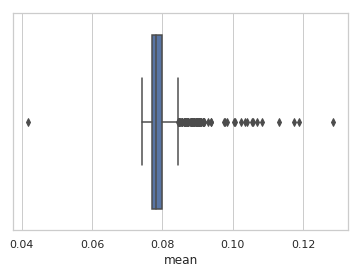

In [91]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=test_datas[test_datas['label']=='benign']['mean'])

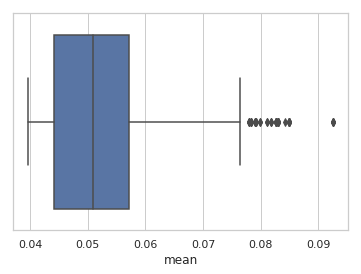

In [92]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=test_datas[test_datas['label']=='botnet']['mean'])

In [93]:
test_datas['label'].value_counts()

benign    1263
botnet    1263
Name: label, dtype: int64

In [94]:
test_benign_data = test_datas[test_datas['label'] == 'benign']
benign_total = len(test_benign_data)

In [95]:
test_botnet_data = test_datas[test_datas['label'] == 'botnet']

In [96]:
malware_loss_value = 0.08

In [97]:
benign_true_benign = len(test_benign_data[test_benign_data['mean'] < malware_loss_value])

In [98]:
benign_false_benign = len(test_benign_data[test_benign_data['mean'] >= malware_loss_value])

In [99]:
TP = benign_true_benign / benign_total
FN = benign_false_benign / benign_total

In [100]:
TP

0.7529691211401425

In [101]:
FN

0.24703087885985747

In [102]:
test_botnet_data = test_datas[test_datas['label'] == 'botnet']
botnet_total = len(test_botnet_data)

In [103]:
botnet_false_botnet = len(test_botnet_data[test_botnet_data['mean'] < malware_loss_value])

In [104]:
botnet_true_botnet = len(test_botnet_data[test_botnet_data['mean'] >= malware_loss_value])

In [105]:
TN = botnet_true_botnet / botnet_total
FP = botnet_false_botnet / botnet_total

In [106]:
TN

0.028503562945368172

In [107]:
FP

0.9714964370546318

In [108]:
len(test_benign_data)

1263

In [68]:
len(test_botnet_data)

599